## Titanic Survival Prediction

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Data types and non-null counts
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Dropping embarked and embark_town since they have only 2 missing values

# Drop columns with missing values
df.drop(['deck', 'embark_town'], axis=1, inplace=True)

# Drop row 'embarked' values (only 2 rows)
df.dropna(subset=['embarked'], inplace=True)

In [7]:
# Fill missing 'age' with the median age
df['age'].fillna(df['age'].median(), inplace=True)

In [8]:
# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2}) #( port where a passenger boarded the Titanic, S = Southampton, C = Cherbourg ,Q = Queenstown)


In [9]:
# Optional: drop unnecessary columns
df.drop(['who', 'adult_male'], axis=1, inplace=True)

In [10]:
# Checking again
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
alive       0
alone       0
dtype: int64

### Data Visualization

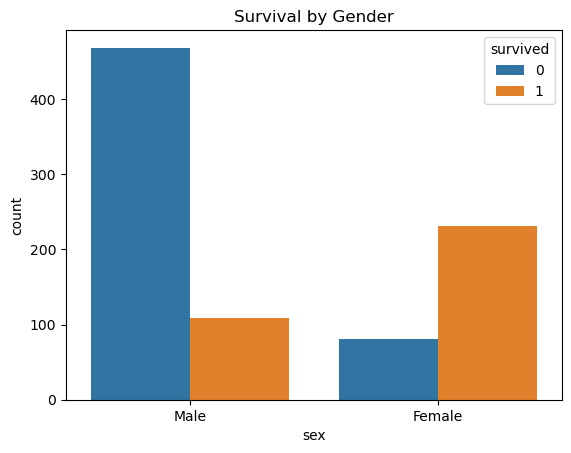

In [13]:
# Survival by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival by Gender')
plt.show()

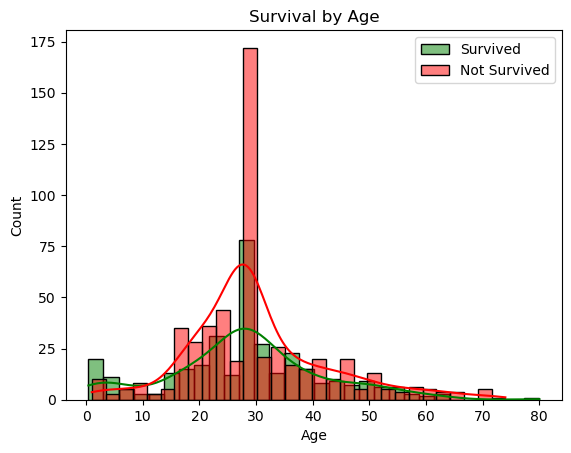

In [25]:
# Survival by Age in same graph
sns.histplot(df[df['survived'] == 1]['age'], kde=True, color='green', label='Survived', bins=30)
sns.histplot(df[df['survived'] == 0]['age'], kde=True, color='red', label='Not Survived', bins=30)
plt.legend()
plt.title('Survival by Age')
plt.xlabel('Age')
plt.show()

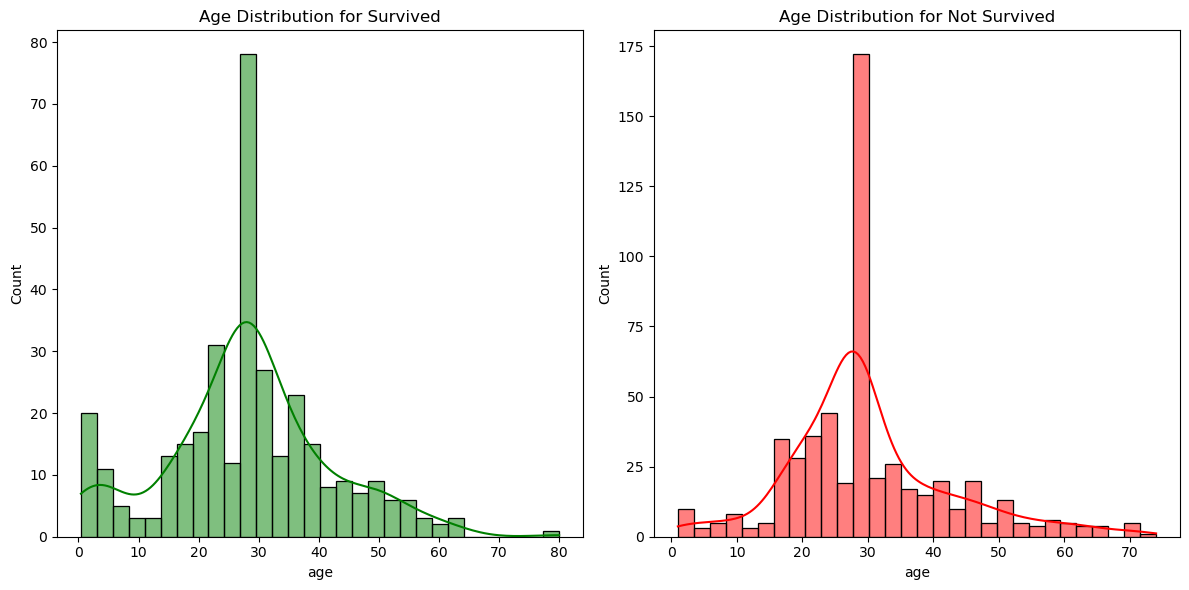

In [24]:
# Create two separate histograms for survived and not survived
plt.figure(figsize=(12, 6))

# Survived = 1
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.histplot(df[df['survived'] == 1]['age'], kde=True, bins=30, color='green')
plt.title('Age Distribution for Survived')

# Not Survived = 0
plt.subplot(1, 2, 2)
sns.histplot(df[df['survived'] == 0]['age'], kde=True, bins=30, color='red')
plt.title('Age Distribution for Not Survived')

plt.tight_layout()
plt.show()


In [17]:
# Features and target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



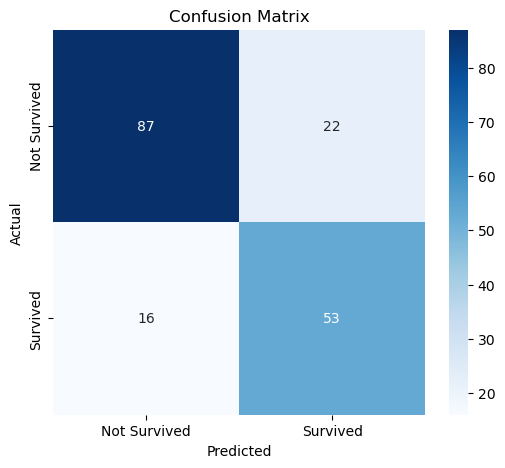

In [21]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

# Title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()